In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
import openpyxl
import ipywidgets as widgets
import xlwt

import os
import sys
sys.path.append('../batteryratecap')
import data_converter

In [2]:
%matplotlib inline

## Case # 1
### Discharge curve &#8594; Capacity rate curve
### E vs Li (<font color=red>V</font>) vs Capacity (<font color=red>Ah cm<sup>-2</sup></font>) &#8594; Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs i (<font color=red>$\mu A$ cm <sup>-2</sup></font>)

### Step 1) Upload and convert potential vs capacity data

In [3]:
file_path = '../doc/Data/performancelog.xls'
sheet_name = ['1_Discharge (Cover2)', '1_Discharge (1C)', '1_Discharge (2C)', '1_Discharge (5C)']
rates = { "C rate": [0.5, 1.0, 2.0, 5.0]}
c_rate = pd.DataFrame(rates)
df_cap_rate = data_converter.potential_rate(file_path, sheet_name, 'Paper # 32', 3, c_rate)
df_cap_rate

C:\Program Files\MiniConda\lib\site-packages\IPython\core\interactiveshell.py:2923: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),C rate,Capacity (mAh/g)
0,0.5,154.154324,0.5,147.303752,0.5,144.812819
1,1.0,149.841197,1.0,139.399821,1.0,135.372662
2,2.0,141.685172,2.0,118.804436,2.0,116.264876
3,5.0,110.398826,5.0,65.780351,5.0,48.477729


### Step 2) Export the new dataframe to an existing excel file

In [4]:
file_path_temp = './Excelfile_ex.xls'
data_converter.excel_merge(df_cap_rate, file_path_temp, 'Capacity_Rate')

saved succesfully to./Excelfile_ex.xls


../batteryratecap\data_converter.py:66: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  dataframe.to_excel(xls_file, sheet_name = sheetname, index=False, header=True)


## Case # 2
### Rate test data &#8594; Capacity rate curve
### Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs Cycle #  &#8594; Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs i (<font color=red>$\mu A$ cm <sup>-2</sup></font>)

###### Loading in excel files

In [5]:
battery_performance = pd.read_excel('../doc/Data/performancelog.xls', sheet_name = None, header=[0, 1, 2])
battery_performance_sheet_names = pd.ExcelFile('../doc/Data/performancelog.xls').sheet_names

###### Creating a different df for each excel sheet in the file

In [6]:
for i, j in enumerate(battery_performance_sheet_names):
    globals()[f'battery_performance_{j}'] = battery_performance[battery_performance_sheet_names[i]]

###### Previewing the dataframe

In [7]:
battery_performance_4_CapacityCycle.head(7)

Paper # 1                  Paper # 2                             \
   Set #1 E                   Set #1 E                   Set #2 E   
    Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)   Cycle #   
0  0.185615       122.911465  1.021898       249.145299  0.948905   
1  1.670534       127.179225  1.897810       197.863248  2.043796   
2  2.969838       119.497258  3.065693       199.572650  2.992701   
3  3.897912       110.961740  4.014599       214.957265  3.868613   
4  5.011601       109.681412  4.963504       261.965812  4.963504   
5  6.125290       110.108188  5.912409       331.196581  5.985401   
6  6.867749       110.961740  6.715328       329.487179  6.934307   

                                                                          ...  \
                    Set #3 E                   Set #4 E                   ...   
  Capacity (mAh/g)   Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)  ...   
0       150.000000  0.912162        70.588235  0.979730        84.873950  ...   
1       129.487179  1.925676        36.554622  1.858108        40.336134  ...   
2       124.358974  3.006757        35.714286  2.939189        42.016807  ...   
3       127.777778  3.885135        35.714286  4.020270        43.277311  ...   
4       130.341880  4.898649        35.294118  4.898649        40.336134  ...   
5       130.341880  5.912162        35.294118  5.979730        50.000000  ...   
6       173.931624  7.060811        40.756303  6.993243        47.058824  ...   

  Paper #29                  Paper #32                              \
   Set #1 E                   Set #1 E                    Set #2 E   
    Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)    Cycle #   
0  1.008547       117.083333  0.970927       173.078008  12.054231   
1  2.017094        96.250000  2.000792       159.745980  13.035055   
2  3.008547       101.805556  3.030656       157.778195  14.064919   
3  4.034188       104.583333  3.962438       157.708333  15.045742   
4  4.991453       105.972222  5.074038       156.485746  19.067118   
5  6.000000       108.194444  6.022167       154.448099  20.096983   
6  7.008547       108.472222  7.002991       153.516604  21.077806   

                                                                            
                    Set #3 E                                                
  Capacity (mAh/g)   Cycle # Capacity (mAh/g) Cycle #.1 Capacity (mAh/g).1  
0       135.951262  0.970927       158.406955       NaN                NaN  
1       135.402345  2.000792       149.848841       NaN                NaN  
2       135.527099  2.981615       148.800909       NaN                NaN  
3       135.585317  3.962438       148.509816       NaN                NaN  
4       116.547880  4.992303       147.857769       NaN                NaN  
5       116.190252  6.022167       144.026995       NaN                NaN  
6        73.075322  7.002991       142.746188       NaN                NaN  

[7 rows x 30 columns]

###### Get the paper and set index for each pair of data in the df

In [8]:
papers = np.array(battery_performance_4_CapacityCycle.columns.get_level_values(0))
papers = papers[0:-1:2]
    
sets = np.array(battery_performance_4_CapacityCycle.columns.get_level_values(1))
sets = sets[0:-1:2]

###### Creating seperate numpy arrays of each pair of data with the name of the variable as the paper and set ID

In [9]:
# Initialize list of all paperX_setX which can be saved as the input for the ipywidget below
list_of_papers_sets = []

for i,j in zip(papers,sets):

        
    globals()[f'capacity_{i}_{j}'] = np.array(battery_performance_4_CapacityCycle[i][j])
    globals()[f'capacity_{i}_{j}'] = globals()[f'capacity_{i}_{j}'][~np.isnan(globals()[f'capacity_{i}_{j}'])]
    globals()[f'capacity_{i}_{j}'] = globals()[f'capacity_{i}_{j}'].reshape(-1,2)
    
    # Keep track of list of unique paper/set 
    list_of_papers_sets.append(f'capacity_{i}_{j}')

In [10]:
list_of_papers_sets

['capacity_Paper # 1_Set #1 E',
 'capacity_Paper # 2_Set #1 E',
 'capacity_Paper # 2_Set #2 E',
 'capacity_Paper # 2_Set #3 E',
 'capacity_Paper # 2_Set #4 E',
 'capacity_Paper #3_Set #1 E',
 'capacity_Paper #4_Set #1 E',
 'capacity_Paper #4_Set #2 E',
 'capacity_Paper #4_Set #3 E',
 'capacity_Paper #19_Set #1 E',
 'capacity_Paper #29_Set #1 E',
 'capacity_Paper #32_Set #1 E',
 'capacity_Paper #32_Set #2 E',
 'capacity_Paper #32_Set #3 E',
 'capacity_Paper #32_Set #3 E']

###### Select ONE paper and run the cell. If you want to see a different paper/set, re-run the cell starting below

In [11]:
user_selected_paper = widgets.SelectMultiple(
    options=list_of_papers_sets,
    #value = ,
    rows=10,
    description='Select paper',
    disabled=False
)

In [12]:
#### NOTE: Run this cell, then select ONE option and run the cell again and make sure your selection is correctly output below
#### if you wish to select a different paper/set, run the cell above first!
user_selected_paper

SelectMultiple(description='Select paper', options=('capacity_Paper # 1_Set #1 E', 'capacity_Paper # 2_Set #1 …

In [14]:
user_selected_paper = user_selected_paper.value[0]
user_selected_paper

'capacity_Paper # 1_Set #1 E'

<function matplotlib.pyplot.show(close=None, block=None)>

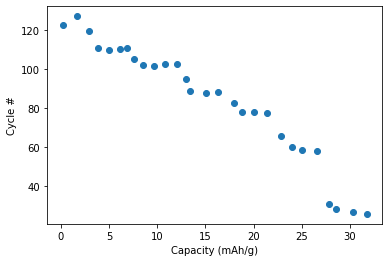

In [15]:
plt.scatter(globals()[user_selected_paper][:,0], globals()[user_selected_paper][:,1])
plt.xlabel("Capacity (mAh/g)")
plt.ylabel("Cycle #")
plt.show

In [16]:
current_list = [50, 250, 500, 1000, 1500, 2500, 5000] # units in µA/cm²

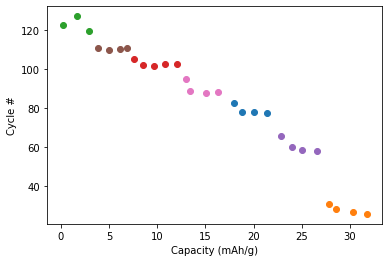

In [17]:
capacity_cycle_array = globals()[user_selected_paper]
df = data_converter.capacity_cycle(capacity_cycle_array, 7, current_list, '(µA/cm²)')

In [18]:
df

,Current (µA/cm²),Capacity (mAh/cm²)
0,50,123.194722
1,250,110.428234
2,500,102.767686
3,1000,89.857444
4,1500,79.022439
5,2500,60.495487
6,5000,27.740435
